In [1]:
from web3 import Web3
import json
import requests
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.graph_objects as go
import math

In [2]:
import pandas as pd
import os
os.chdir('C:\\Users\\Shyam\\Documents\\GitHub\\beacondigest\\notebooks\\2021\\even more eip1559 paper\\random_forest_regression')

In [8]:
df1 = pd.read_csv('sipher_inu-clean.csv',low_memory = False)
df1 = df1[df1['toaddress'] == '0x315bc085a14e251f129a361afa37205e3313bf15']
df1.head(5)

,detecttime,hash,status,gas,gasprice,curblocknumber,timepending,blockspending,replace,fromaddress,toaddress,nonce,type,basefeepergas,maxpriorityfeepergas,maxfeepergas
110495,2021-09-09T22:01:35.926Z,0x6383bcf821eace3faf8cd99fc0ab665af98fd8c51a8d...,pending,298200,NaN,13194162,NaN,NaN,NaN,0x24125778fa4e94af9f10067d3641746278f2eaf7,0x315bc085a14e251f129a361afa37205e3313bf15,0,2,67532865905,1.000000e+09,6.614665e+10
206618,2021-09-09T20:14:00.767Z,0x5c72c9783b7cfacd5eb03c490b955346dfcdd60b86c7...,pending,293634,NaN,13193643,NaN,NaN,NaN,0x58122b2bfe5a0eb10bcbb07f546d482c8e804e03,0x315bc085a14e251f129a361afa37205e3313bf15,1,2,120950260833,2.000000e+09,2.000000e+11
218773,2021-09-09T19:59:09.280Z,0x9eae19065cf3884ea1b5387156957185def9b56f3422...,pending,296656,NaN,13193580,NaN,NaN,NaN,0xa4195b443f11e796551a9485c486a84485b0c047,0x315bc085a14e251f129a361afa37205e3313bf15,69,2,94561185329,2.000000e+09,1.290000e+11
444124,2021-09-09T15:59:37.763Z,0xc4ae342bb6c87184a1f7e91c46267ff436c015ecbd54...,pending,296656,NaN,13192455,NaN,NaN,NaN,0x8948c23524d3fa1bd56091a346f3d59b95d7ddc7,0x315bc085a14e251f129a361afa37205e3313bf15,5,2,101741921507,2.000000e+09,1.390000e+11
699242,2021-09-09T11:31:02.187Z,0x01085e138a0b405393c8e9fc535dc921f7473a4a5f6b...,pending,296656,NaN,13191268,NaN,NaN,NaN,0x95118e8dd38fb455467db7dfa6bf97075801faa5,0x315bc085a14e251f129a361afa37205e3313bf15,9,2,76836989600,2.000000e+09,1.180000e+11


## Timing of incoming transactions

In [4]:
df1_counts = df1['curblocknumber'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df1_counts.head(5)

,unique_values,counts
0,13188760,4312
1,13188759,365
2,13188761,332
3,13188767,308
4,13188773,258


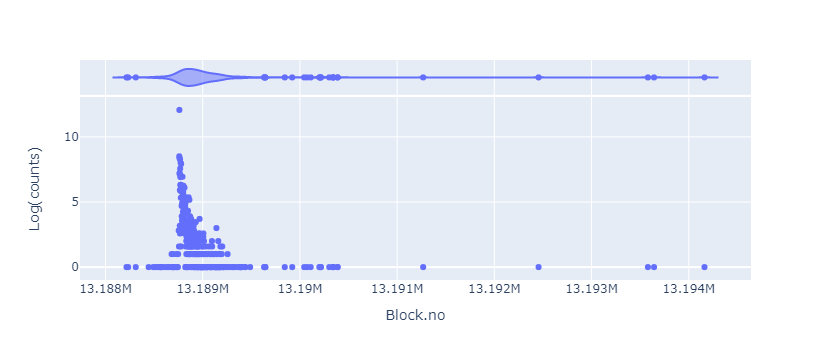

In [5]:
df1_counts['log_count'] = np.log2(df1_counts['counts'])
fig = px.scatter(df1_counts, x="unique_values", y="log_count", marginal_x="violin", labels = {"unique_values": "Block.no", "log_count": "Log(counts)"})
fig.show()

## How many of these transactions made it on chain?

In [11]:
df2 = pd.read_csv('txs-sipher_inu-full.csv',low_memory = False)
df2 = df2[df2['to_address'] == '0x315bc085a14e251f129a361afa37205e3313bf15']
df2.head(5)

,hash,nonce,block_number,from_address,to_address,value,gas,gas_used,gas_price,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
5138,0xb2b597af3335367154d8c05c8886a7ceece13755374e...,15,13188448,0xd7826e03891709a3cc300cc2a7bc6479260e35df,0x315bc085a14e251f129a361afa37205e3313bf15,100000000000000000,296656,195730,84066324670,1.390000e+11,2.000000e+09,2
10561,0xfba4fb52906993a5efeb7de3e1f95bd822b9268f59e8...,20,13188493,0xfe7a1013baa171211028504ed3bb70d8b4563dd5,0x315bc085a14e251f129a361afa37205e3313bf15,100000000000000000,296656,33006,700000000000,7.000000e+11,4.000000e+10,2
11968,0xd23fb2c30d7e95f4e7ae7e0e8ef12422063131ae3e15...,569,13188217,0x7981163dd394d7f45b8f470a7db099d9150480d7,0x315bc085a14e251f129a361afa37205e3313bf15,500000000000000000,2500000,33006,1337800000000,1.337800e+12,1.337600e+12,2
15724,0x4186d7e27525ea5a8c681c8408b37cc3d6e529c4a00e...,0,13188234,0x04fd10516b882c87ae92de7bd3287745398dbc09,0x315bc085a14e251f129a361afa37205e3313bf15,100000000000000000,296656,195730,113924592573,1.310000e+11,2.000000e+09,2
33155,0x6035dc7c561456d01ae1a4bcd34f2243e53609cb349b...,0,13188312,0xfcc41e53c062a4b83ff2d2f6f14c48311d2813e3,0x315bc085a14e251f129a361afa37205e3313bf15,100000000000000000,296656,195730,93271036367,1.220000e+11,2.000000e+09,2


In [26]:
df1['is_onchain'] = df1['hash'].isin(list(df2['hash']))
df1['is_onchain'] = df1['is_onchain'].astype(bool)
df1.head(5)

,detecttime,hash,status,gas,gasprice,curblocknumber,timepending,blockspending,replace,fromaddress,toaddress,nonce,type,basefeepergas,maxpriorityfeepergas,maxfeepergas,is_onchain
110495,2021-09-09T22:01:35.926Z,0x6383bcf821eace3faf8cd99fc0ab665af98fd8c51a8d...,pending,298200,NaN,13194162,NaN,NaN,NaN,0x24125778fa4e94af9f10067d3641746278f2eaf7,0x315bc085a14e251f129a361afa37205e3313bf15,0,2,67532865905,1.000000e+09,6.614665e+10,False
206618,2021-09-09T20:14:00.767Z,0x5c72c9783b7cfacd5eb03c490b955346dfcdd60b86c7...,pending,293634,NaN,13193643,NaN,NaN,NaN,0x58122b2bfe5a0eb10bcbb07f546d482c8e804e03,0x315bc085a14e251f129a361afa37205e3313bf15,1,2,120950260833,2.000000e+09,2.000000e+11,True
218773,2021-09-09T19:59:09.280Z,0x9eae19065cf3884ea1b5387156957185def9b56f3422...,pending,296656,NaN,13193580,NaN,NaN,NaN,0xa4195b443f11e796551a9485c486a84485b0c047,0x315bc085a14e251f129a361afa37205e3313bf15,69,2,94561185329,2.000000e+09,1.290000e+11,True
444124,2021-09-09T15:59:37.763Z,0xc4ae342bb6c87184a1f7e91c46267ff436c015ecbd54...,pending,296656,NaN,13192455,NaN,NaN,NaN,0x8948c23524d3fa1bd56091a346f3d59b95d7ddc7,0x315bc085a14e251f129a361afa37205e3313bf15,5,2,101741921507,2.000000e+09,1.390000e+11,True
699242,2021-09-09T11:31:02.187Z,0x01085e138a0b405393c8e9fc535dc921f7473a4a5f6b...,pending,296656,NaN,13191268,NaN,NaN,NaN,0x95118e8dd38fb455467db7dfa6bf97075801faa5,0x315bc085a14e251f129a361afa37205e3313bf15,9,2,76836989600,2.000000e+09,1.180000e+11,True


In [27]:
df1_counts = df1.groupby(['curblocknumber','is_onchain']).size().reset_index().rename(columns={0:'count'}) #df1[''].value_counts().rename_axis('unique_values').reset_index(name='counts')
df1_counts.head(5)

,curblocknumber,is_onchain,count
0,13188216,True,1
1,13188233,True,1
2,13188311,True,1
3,13188444,True,1
4,13188491,True,1


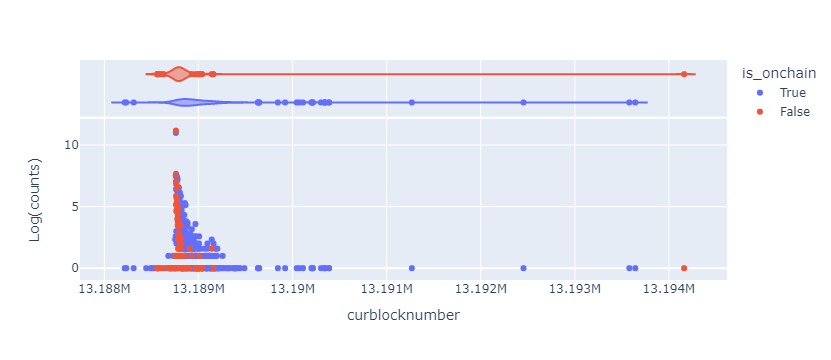

In [32]:
df1_counts['log_count'] = np.log2(df1_counts['count'])
fig = px.scatter(df1_counts, x="curblocknumber", y="log_count", color = "is_onchain", marginal_x="violin", labels = {"unique_values": "Block.no", "log_count": "Log(counts)"})
fig.show()

## Gas limit of transactions on mempool

In [35]:
#a = df1.groupby(['gas','status']).size().reset_index(name='counts')
a = df1.groupby(['gas']).size().reset_index(name='counts')
a = a.sort_values(by=['counts'], ascending=False)
a['log_count'] = np.log2(a['counts'])

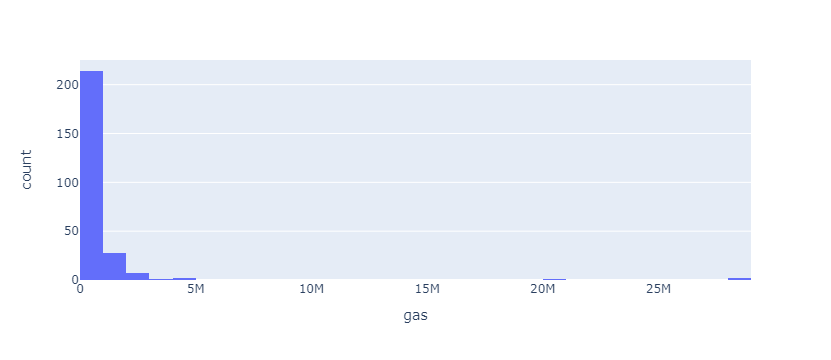

In [36]:
fig = px.histogram(a, x="gas")
fig.show()

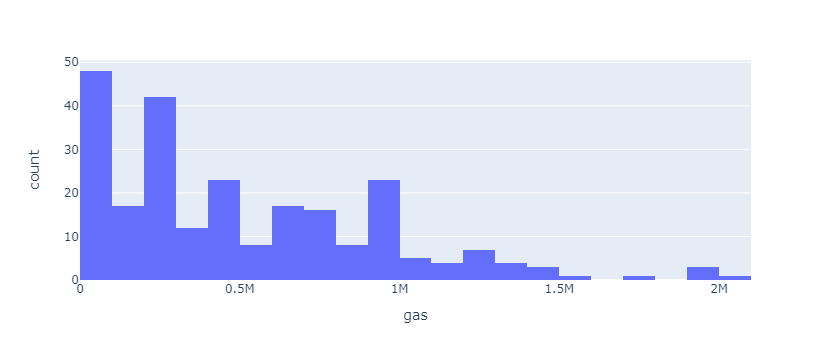

In [37]:
a_copy = a[a['gas'] <= 2000000]
fig = px.histogram(a_copy, x="gas")
fig.show()

## Gas used by different transaction on-chain

In [68]:
a = df2.groupby(['gas_used']).size().reset_index(name='counts')
a = a.sort_values(by=['counts'], ascending=False)
a['log_count'] = np.log2(a['counts'])
a.head(5)

,gas_used,counts,log_count
14,28392,3031,11.565578
84,652671,1187,10.213104
56,193715,337,8.396605
69,308454,221,7.787903
22,33006,175,7.451211


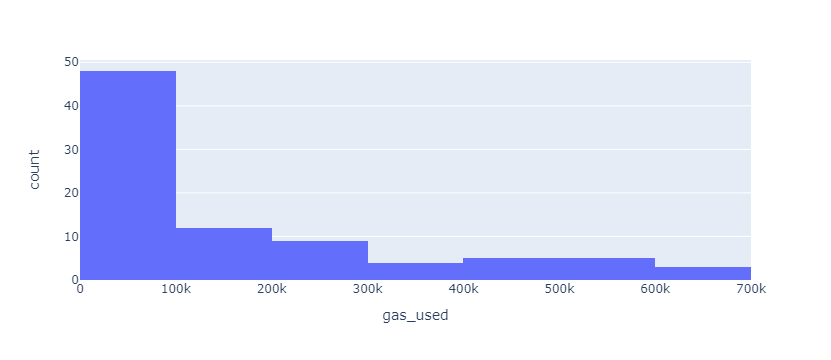

In [39]:
fig = px.histogram(a, x="gas_used")
fig.show()

## Inclusion time

In [71]:
a1 = df1[['hash','curblocknumber']]
a2 = df2[['hash', 'block_number']]
df_merged = pd.merge(a1, a2, on='hash')
df_merged['inclusion_time'] = df_merged['block_number'] - df_merged['curblocknumber']
df_merged = df_merged.sort_values(by=['block_number'], ascending=True)
df_merged['no'] = range(1,len(df_merged)+1,1)
df_merged.head(5)

,hash,curblocknumber,block_number,inclusion_time,no
5624,0xd23fb2c30d7e95f4e7ae7e0e8ef12422063131ae3e15...,13188216,13188217,1,1
5623,0x4186d7e27525ea5a8c681c8408b37cc3d6e529c4a00e...,13188233,13188234,1,2
5622,0x6035dc7c561456d01ae1a4bcd34f2243e53609cb349b...,13188311,13188312,1,3
5621,0xb2b597af3335367154d8c05c8886a7ceece13755374e...,13188444,13188448,4,4
5620,0xfba4fb52906993a5efeb7de3e1f95bd822b9268f59e8...,13188491,13188493,2,5


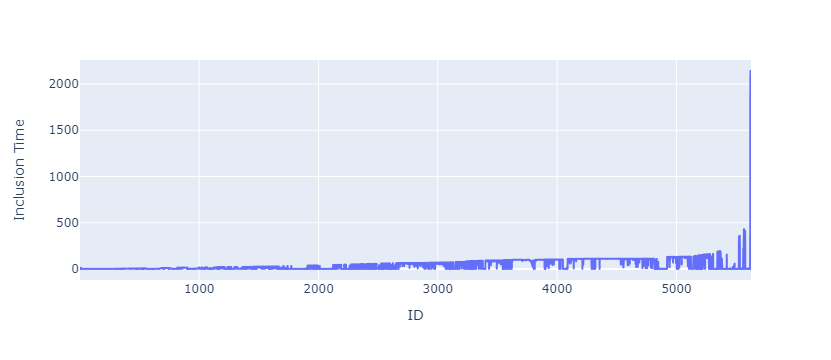

In [72]:
fig = px.line(df_merged, x="no", y="inclusion_time", labels = {"no": "ID", "inclusion_time": "Inclusion Time"})
fig.show()

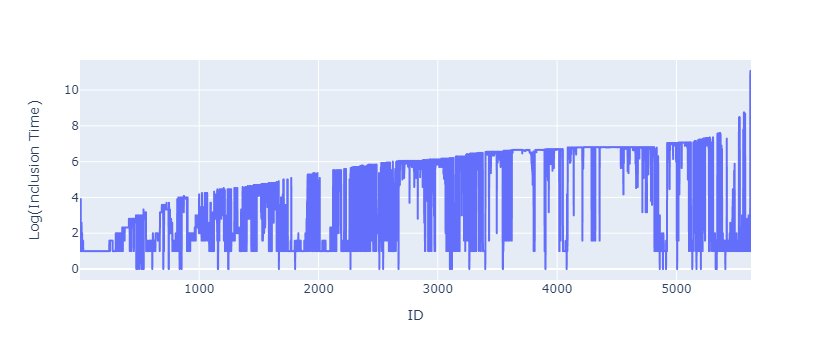

In [73]:
df_merged['log_inclusion_time'] = np.log2(df_merged['inclusion_time'] + 1)
fig = px.line(df_merged, x="no", y="log_inclusion_time", labels = {"no": "ID", "log_inclusion_time": "Log(Inclusion Time)"})
fig.show()

## Fraction of transactions seen in mempool

In [93]:
df2_copy = df2
df2_copy = df2_copy.sort_values(by = ['block_number'], ascending = True)
df2_copy['is_from_mempool'] = df2_copy['hash'].isin(list(df1['hash'])).astype(int)
df2_copy['ones'] = np.ones(len(df2_copy))
df2_copy = df2_copy[['block_number','is_from_mempool','ones']]
df2_copy.head(5)

,block_number,is_from_mempool,ones
49297,13188132,0,1.0
55755,13188168,0,1.0
60304,13188193,0,1.0
62618,13188206,0,1.0
11968,13188217,1,1.0


In [94]:
running_out_of_names = df2_copy.groupby(['block_number']).sum() #df1[''].value_counts().rename_axis('unique_values').reset_index(name='counts')
running_out_of_names['fraction'] = running_out_of_names['is_from_mempool']/running_out_of_names['ones']
running_out_of_names['block_number'] = df2_copy.block_number.unique()

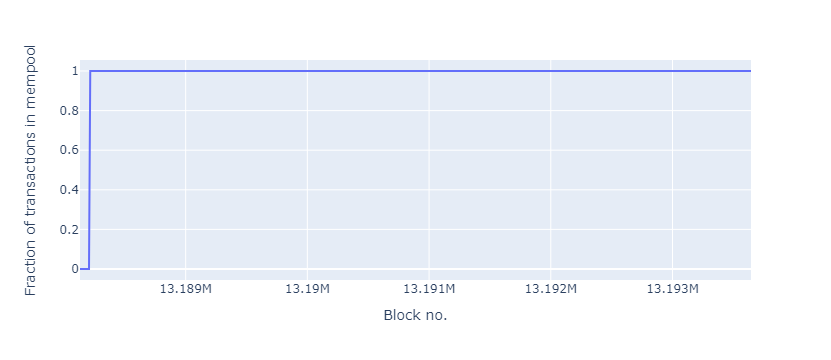

In [95]:
fig = px.line(running_out_of_names, x="block_number", y="fraction", labels = {"block_number": "Block no.", "fraction": "Fraction of transactions in mempool"})
fig.show()